In [4]:
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pl.read_csv('/home/addo/dev/projects/mip/assets/hehe.csv')
df.head(15)

age,sex,bmi,children,smoker,region,charges,heart_disease_history,occupation
i64,str,f64,i64,str,str,f64,str,str
19,"""female""",27.9,0,"""yes""","""Asia""",16884.924,"""no""","""student"""
18,"""male""",33.77,1,"""no""","""North America""",1725.5523,"""yes""","""salaried"""
28,"""male""",33.0,3,"""no""","""Africa""",4449.462,"""yes""","""student"""
33,"""male""",22.705,0,"""no""","""Oceania""",21984.47061,"""no""","""student"""
32,"""male""",28.88,0,"""no""","""Europe""",3866.8552,"""no""","""business"""
…,…,…,…,…,…,…,…,…
25,"""male""",26.22,0,"""no""","""Antarctica""",2721.3208,"""no""","""student"""
62,"""female""",26.29,0,"""yes""","""Oceania""",27808.7251,"""no""","""unemployed"""
23,"""male""",34.4,0,"""no""","""South America""",1826.843,"""no""","""unemployed"""


In [6]:
# checking for null values
df.drop_nulls()

age,sex,bmi,children,smoker,region,charges,heart_disease_history,occupation
i64,str,f64,i64,str,str,f64,str,str
19,"""female""",27.9,0,"""yes""","""Asia""",16884.924,"""no""","""student"""
18,"""male""",33.77,1,"""no""","""North America""",1725.5523,"""yes""","""salaried"""
28,"""male""",33.0,3,"""no""","""Africa""",4449.462,"""yes""","""student"""
33,"""male""",22.705,0,"""no""","""Oceania""",21984.47061,"""no""","""student"""
32,"""male""",28.88,0,"""no""","""Europe""",3866.8552,"""no""","""business"""
…,…,…,…,…,…,…,…,…
27,"""female""",38.2,4,"""no""","""Africa""",19419.04,"""no""","""salaried"""
28,"""female""",20.5,0,"""no""","""North America""",37473.26,"""yes""","""salaried"""
65,"""female""",18.7,1,"""yes""","""Antarctica""",24742.95,"""yes""","""salaried"""


In [7]:
df = df.rename({"sex": "gender"})

In [8]:
df = df.filter(df.is_unique())
df.filter(df.is_duplicated())

age,gender,bmi,children,smoker,region,charges,heart_disease_history,occupation
i64,str,f64,i64,str,str,f64,str,str


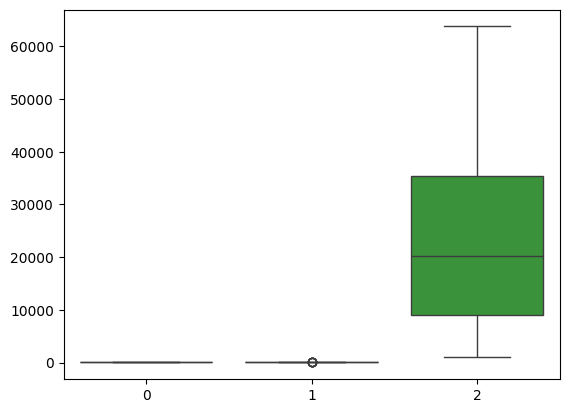

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.select("age", "bmi", "charges"))  # Replace with your columns
plt.show()

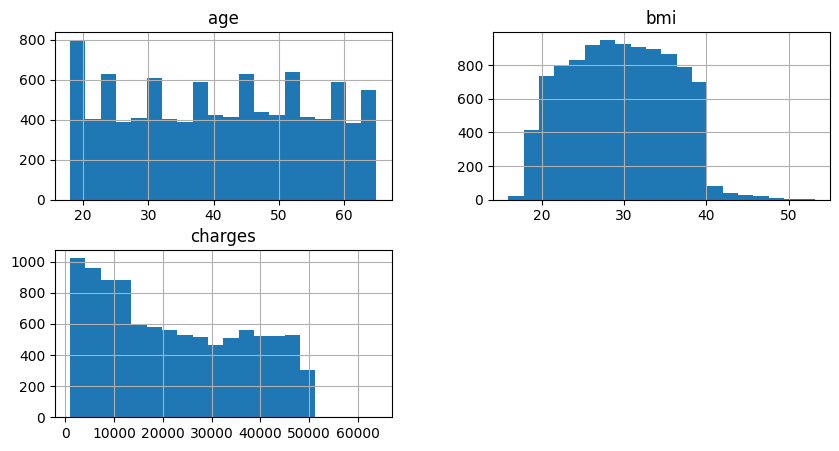

In [10]:
# check for data distribution
df_pd = df.to_pandas()
df_pd[["age", "bmi", "charges"]].hist(bins=20, figsize=(10, 5))
plt.show()

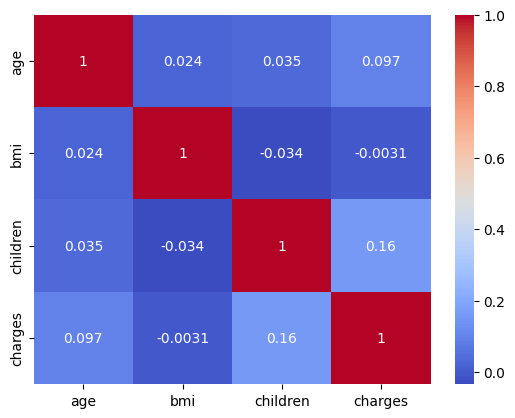

In [11]:
sns.heatmap(df_pd.corr(method='pearson', numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [12]:
le = LabelEncoder()
df = df.with_columns(pl.Series("gender", le.fit_transform(df["gender"].to_list())))
df = df.with_columns(pl.Series("smoker", le.fit_transform(df["smoker"].to_list())))
df = df.with_columns(pl.Series("region", le.fit_transform(df["region"].to_list())))
df = df.with_columns(pl.Series("heart_disease_history", le.fit_transform(df["heart_disease_history"].to_list())))
df = df.with_columns(pl.Series("occupation", le.fit_transform(df["occupation"].to_list())))
df.head(15)

age,gender,bmi,children,smoker,region,charges,heart_disease_history,occupation
i64,i64,f64,i64,i64,i64,f64,i64,i64
19,0,27.9,0,1,2,16884.924,0,2
18,1,33.77,1,0,4,1725.5523,1,1
28,1,33.0,3,0,0,4449.462,1,2
33,1,22.705,0,0,5,21984.47061,0,2
32,1,28.88,0,0,3,3866.8552,0,0
…,…,…,…,…,…,…,…,…
25,1,26.22,0,0,1,2721.3208,0,2
62,0,26.29,0,1,5,27808.7251,0,3
23,1,34.4,0,0,6,1826.843,0,3


## Model Creation

In [20]:
X = df.drop("charges").to_numpy()
y = df["charges"].to_numpy()

y_log = np.log(y + 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error"
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

y_pred_best = best_model.predict(X_test_scaled)


y_pred_best_original = np.exp(y_pred_best) 

np_stuff = np.exp(y_test)
mse_best = mean_squared_error(np_stuff, y_pred_best_original)
mae_best = mean_absolute_error(np_stuff, y_pred_best_original)
r2_best = r2_score(np_stuff, y_pred_best_original)

print(f"Best Random Forest MSE: {mse_best}")
print(f"Best Random Forest MAE: {mae_best}")
print(f"Best Random Forest R²: {r2_best}")

In [15]:
import pickle


with open("/home/addo/dev/projects/mip/model/rf_model.pkl", "wb") as f:
    pickle.dump(best_model, f)